## HOUSE PRICE PREDICTION

### Linear Regression Model building

**Problem:Predict the house price of unit area**

### 1.Loading necessary libraries

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

### 2.Loading Dataset

In [155]:
import pandas as pd
rs=pd.read_csv("C:\\Users\\DERLIN DOMINIC\\Desktop\\Real estate.csv",encoding='unicode_escape')
rs

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


This data set is Real estate dataset.It includes different factors for house purchase and cost.We have 414 rows and 8 columns in this data.This dataset contains columns such as:
- No:Different uniques nos given to the houses
- X1 transaction date: This gives the date which the amount of purchase of the house was credited to the account or which the transaction happended
- X2 house age: it provides data on how much years it was when the house was built
- X3 distance to the nearest MRT station: It is the disatnce of the house located from the nearest transport station
- X4 number of convenience stores: It provides data about the no of convenience stores nearby the house
- X5 latitude: It states about the location on the house in latitude axis
- X6 longitude: It states about the location on the house in latitude axis
- Y house price of unit area: It is the price of house of unit area

In [156]:
rs.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


We are trying to find out is our data clean and is there any missing value here we can see that there is no missing values.



### 3. Statistical Description

In [157]:
rs.shape

(414, 8)

In [158]:
rs.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


We can see that we have total of 414 rows and 8 columns.The describe function give an idea about the distribution of the data i.e, mean,median and IQR of the data. The average of house price of unit area is 37.980193 .The standard deviation is 13.606488  which is less than the mean the data will be positively skewed. We can see further about skewness and outliers when we conduct further tests.

In [159]:
rs.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

As we can see from the above there is 8 variables and we have integers,floats in our data

### 4. TESTING FOR MISSING VALUES

In [160]:
print(rs.isnull().sum())

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


Here we can see that there is no missing values in the data. So we are proceeding with our analysis

### 5. Identifying Outliers

Frist we are running IQR test.For identifying, checked several methods like quartile method(IQR),through skewness,through visualization.We are checking outliers in Y house price of unit area,X5 latitude,	X6 longitude,X3 distance to the nearest MRT station	X4 number of convenience stores which are important column for our analysis

In [162]:
Q1 = rs.quantile(0.25)
Q3 = rs.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

No                                         206.500000
X1 transaction date                          0.500000
X2 house age                                19.125000
X3 distance to the nearest MRT station    1164.954200
X4 number of convenience stores              5.000000
X5 latitude                                  0.014455
X6 longitude                                 0.015220
Y house price of unit area                  18.900000
dtype: float64


In [163]:
print(rs < (Q1 - 1.5 * IQR)) |(rs > (Q3 + 1.5 * IQR))

        No  X1 transaction date  X2 house age  \
0    False                False         False   
1    False                False         False   
2    False                False         False   
3    False                False         False   
4    False                False         False   
..     ...                  ...           ...   
409  False                False         False   
410  False                False         False   
411  False                False         False   
412  False                False         False   
413  False                False         False   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                     False                            False   
1                                     False                            False   
2                                     False                            False   
3                                     False                            False   
4          

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

As house price of unit area is the target variable column we are checking outliers. 

<AxesSubplot:xlabel='Y house price of unit area'>

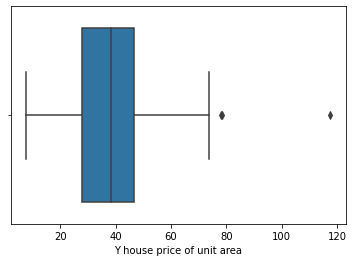

In [164]:
sns.boxplot(x=rs['Y house price of unit area'])

Here we can see there is outlier in this column so we are removing this outlier by replacing the median and mean which would be the best option in this case.

In [165]:
print(rs['Y house price of unit area'].quantile(0.50)) 
print(rs['Y house price of unit area'].quantile(0.95)) 
rs['Y house price of unit area'] = np.where(rs['Y house price of unit area'] > 59.17, 38.45, rs['Y house price of unit area'])
rs.describe()

38.45
59.17499999999998


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,36.474758
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,11.352726
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.425000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,44.300000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,59.000000


<AxesSubplot:xlabel='Y house price of unit area'>

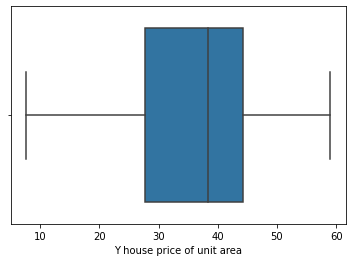

In [166]:
sns.boxplot(x=rs['Y house price of unit area'])

The oulier in this column is removed

<AxesSubplot:xlabel='X4 number of convenience stores'>

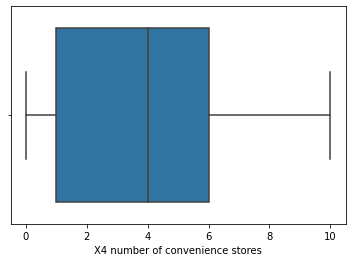

In [167]:
sns.boxplot(x=rs['X4 number of convenience stores'])

There is no outlier detected in X4 number of convenience stores column

<AxesSubplot:xlabel='X5 latitude'>

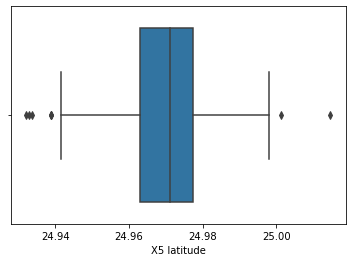

In [168]:
sns.boxplot(x=rs['X5 latitude'])

In [169]:
print(rs['X5 latitude'].quantile(0.10)) 
print(rs['X5 latitude'].quantile(0.90)) 
rs['X5 latitude'] = np.where(rs['X5 latitude'] > 24.985704, 24.951299, rs['X5 latitude'])
rs.describe()

24.951299
24.982442


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.967022,121.533361,36.474758
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.011814,0.015347,11.352726
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.958850,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.968600,121.538630,38.425000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.975830,121.543305,44.300000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,24.985690,121.566270,59.000000


<AxesSubplot:xlabel='X5 latitude'>

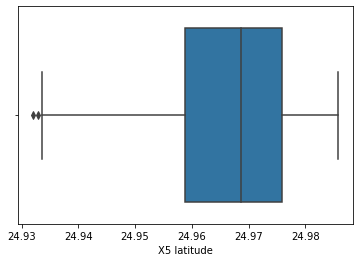

In [170]:
sns.boxplot(x=rs['X5 latitude'])

Outliers was detected in X5 latitude column and it was handled by replacing the median 

<AxesSubplot:xlabel='X6 longitude'>

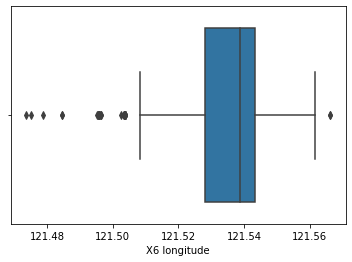

In [92]:
sns.boxplot(x=rs['X6 longitude'])

In [171]:
print(rs['X6 longitude'].quantile(0.10))
print(rs['X6 longitude'].quantile(0.90))

121.51237
121.54721999999998


In [172]:
print(rs['X6 longitude'].skew())
rs["X6 longitude"] = np.where(rs["X6 longitude"] <121.51237, 121.51237,rs['X6 longitude'])
rs["X6 longitude"] = np.where(rs["X6 longitude"] >121.54721999999998,121.54721999999998,rs['X6 longitude'])
print(rs['X6 longitude'].skew())

-1.2195914979890832
-0.8489531037705006


<AxesSubplot:xlabel='X6 longitude'>

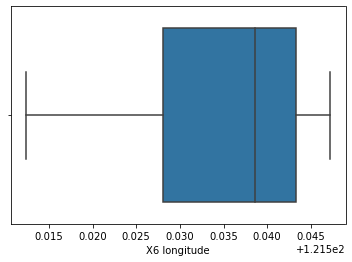

In [173]:
sns.boxplot(x=rs['X6 longitude'])

Here the X6 longitude detected outlier and it was removed using Quantile-based Flooring and Capping as this was appropriate for this case.

we found out missing values in X6 longitude column and it is handled

<AxesSubplot:xlabel='X3 distance to the nearest MRT station'>

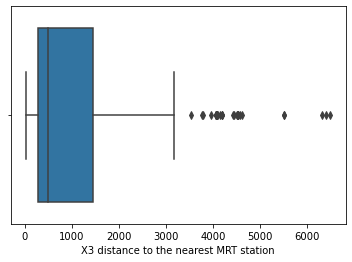

In [129]:
sns.boxplot(x=rs['X3 distance to the nearest MRT station'])

In [175]:
print(rs['X3 distance to the nearest MRT station'].quantile(0.50)) 
print(rs['X3 distance to the nearest MRT station'].quantile(0.95)) 

492.2313
4082.015


### 6. Correlation Analysis

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,0.010865,-0.042396,-0.050619
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,-0.024210,-0.035272,0.021612
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.055929,-0.005369,-0.230138
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.673740,-0.749572,-0.722060
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.508329,0.487424,0.589821
X5 latitude,0.010865,-0.024210,0.055929,-0.673740,0.508329,1.000000,0.439212,0.603278
X6 longitude,-0.042396,-0.035272,-0.005369,-0.749572,0.487424,0.439212,1.000000,0.572674
Y house price of unit area,-0.050619,0.021612,-0.230138,-0.722060,0.589821,0.603278,0.572674,1.000000


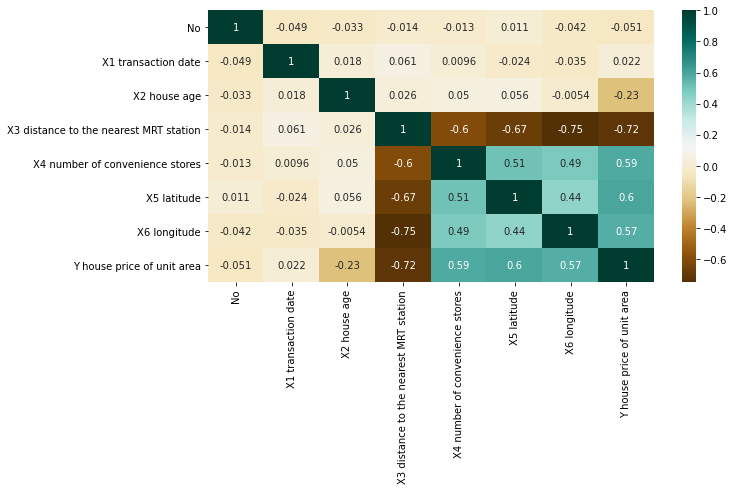

In [176]:
plt.figure(figsize=(10,5))
c= rs.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

   As We can observe form this heat map there is correlation between house price of unit area to X5 latitude,X6 longitude,X4 number of convenience stores and X3 distance to the nearest MRT station. Thre is a correlation of 0.6 between X6 longitude and house price which is a positive correlation and there is a strong negative correlation between the distance to the nearest MRT station to price of the house. And also a positive correlation between number of convenience store and house price.

### 6. Plotting Graphs

Now we are plotting graphs for better understanding

array([[<AxesSubplot:title={'center':'No'}>,
        <AxesSubplot:title={'center':'X1 transaction date'}>,
        <AxesSubplot:title={'center':'X2 house age'}>],
       [<AxesSubplot:title={'center':'X3 distance to the nearest MRT station'}>,
        <AxesSubplot:title={'center':'X4 number of convenience stores'}>,
        <AxesSubplot:title={'center':'X5 latitude'}>],
       [<AxesSubplot:title={'center':'X6 longitude'}>,
        <AxesSubplot:title={'center':'Y house price of unit area'}>,
        <AxesSubplot:>]], dtype=object)

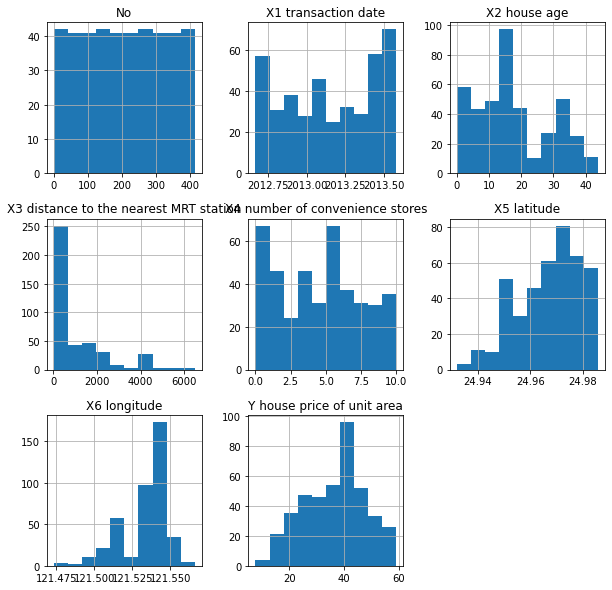

In [96]:
rs.hist(figsize=(10,10))

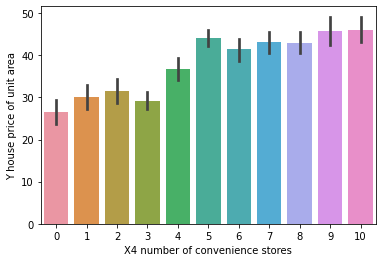

In [97]:
sns.barplot(x=rs['X4 number of convenience stores'], y=rs['Y house price of unit area']);

As the number of convenience stores increase in the locality, House price goes up.
This shows positive relation between these attributes.

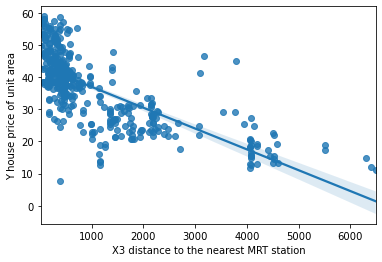

In [98]:
sns.regplot(x=rs['X3 distance to the nearest MRT station'], y=rs['Y house price of unit area']);

This states that the houses that are near to MRT station have higher price

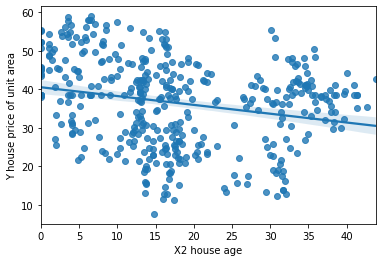

In [99]:
sns.regplot(x=rs['X2 house age'], y=rs['Y house price of unit area']);

The trend line shows house price reducing with increase in house age.
These attributes show a negative relation

<AxesSubplot:xlabel='X2 house age', ylabel='X3 distance to the nearest MRT station'>

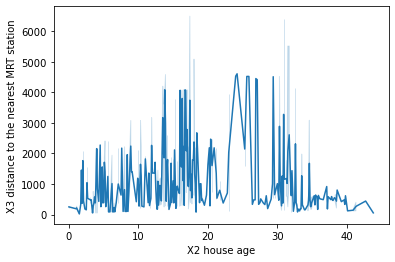

In [115]:
sns.lineplot(x=rs['X2 house age'], y=rs['X3 distance to the nearest MRT station'])

This shows that houses with an average age of 15 - 20 years have high distances to MRT station while the houses aged for 35+ years are more closer to the stations

EDA Analysis:Houses with more convenience stores in the area, with low age have high prices
Houses that are aged have more MRT stations near them and fall in low price.

### 7.Feature Selection

From EDA and plotting graphs we understood the important columns which making importances and which all are correlated. So The targeted variable is Y house price of unit area and the variables which affecting is X2 house age,X3 distance to the nearest MRT station, X4 number of convenience stores,X5 latitude,X6 longitude. These columns were selected as there were correlated and some relation was showing between them and they affected the price of house.

In [180]:
df = rs.drop(['X1 transaction date','No'], axis=1)
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.982980,121.54024,37.9
1,19.5,306.59470,9,24.980340,121.53951,42.2
2,13.3,561.98450,5,24.951299,121.54391,47.3
3,13.3,561.98450,5,24.951299,121.54391,54.8
4,5.0,390.56840,5,24.979370,121.54245,43.1


### 8.Splitting the data

In [181]:
X = df[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']]
y = df['Y house price of unit area']
X.shape

(414, 5)

Here we assaigned the targeted variable to y and the independent variables to X.Now we have 414 rows and 5 columns.

In [118]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)# We splitted the data into 80 20 ratio

Here we split the data according to test and train.The above script splits 80% of the data to training set while 20% of the data to test set.

In [119]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

### 9.Linear Regression Model Building

In [120]:
import sklearn 
from sklearn import linear_model
model_ols = LinearRegression().fit(X_train, y_train)
get_cv_scores(model_ols)

CV Mean:  0.5849402936350571
STD:  0.12427221314983129




In [121]:
model_ols.fit(X_train, y_train)

LinearRegression()

In [1]:
#testing the accuracy
accuracy = model_ols.score(X_test, y_test)
print("Accuracy:",(int(round(accuracy*100))))

NameError: name 'model_ols' is not defined

This model shows an accuracy of 68%

### Predictions

In [123]:
y_pred = model_ols.predict(X_test)

In [124]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
356,45.3,39.882183
170,14.4,14.307821
224,46.0,39.143195
331,15.6,14.086833
306,50.2,38.966625


Although our model is not very accurate it showed 68% accuracy, the predicted value is close to the actual value in many cases.

In [2]:
print(model_ols.intercept_)
print(model_ols.coef_)

NameError: name 'model_ols' is not defined

This Gives an idea about every unit in increase of langitude or logitude or no of stores how will the price of house changes

### Evaluation
The final step is to evaluate the performance of the algorithm. This step is particularly important for comparing the performance of different algorithms on specific data sets

In [126]:
import statistics
SSE = sum((y_pred -  y_tet)**2)
SST = sum((statistics.mean(y_pred)-y_test)**2)
R2=1-SSE/SST
R2

0.6798757221306653

This evaluation is done in two parts. 
1. Test to establish the robustness of the model. 
2. Test to evaluate the accuracy of the model

In [127]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.152515180970827
Mean Squared Error: 42.00752070196518
Root Mean Squared Error: 6.481320907188995


### 10.Interpretation

- The model provides the equation for the predicting the house price of unit area given its age,location,distancce from stores,MR stations.It 68% predict the correct values.We got Root Mean Squared Error as 6.48132 .For these three specific data points, the model is only able to explain 6.481% of the variation which is not good enough. 
- it means that some other factors will be affecting this variable. The features we used may not have had a high enough correlation to the values we were trying to predict. We assume that this data has a linear relationship but that may not be fully correct.
- AE is simply, the mean of the absolute errors. The absolute error is the absolute value of the difference between the forecasted value and the actual value. Here we have 5.12 which shows there is a difference between forecasted value and the actual value so our model is not fully correct.The model can be used further findings of factors affecting or more data


### 11. Conclusion

We used data set Real estate to do the price prediction per unit area. We have started with data description we had 414 rows and 8 columns.For understaning the data we conducted statistical description of data. Further we tested for missing values and we found out that data was not having any missing values. Then we conducted test for outliers and we found out outliers in Y house price of unit area,X5 latitude,X6 longitude,	X3 distance to the nearest MRT station and we handled the ouliers using replacing with median and capping method. For better understanding of data we plotted graphs and correlation analysis and understood there is relation between varables and they are correlated.Then we selected important columns,dropped 2 unnecessary column and then started buliding model. so we split the data according to train and test and build linear regression model. We got an accuracy of 68% and we predicted the model,evaluated and interpreted.